Pobierz dane dotyczące scoringu kredytowego

*Pracujesz jako analityk danych w globalnej firmie finansowej. Przez lata firma gromadziła podstawowe dane bankowe i wiele informacji związanych z kredytami. Kierownictwo chce zbudować inteligentny system do segregowania ludzi w przedziałach oceny kredytowej, aby zmniejszyć wysiłek ręczny.*

**Zadanie na dziś: przygotować dane do modelu**

In [1]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

import danych

In [2]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "train.csv"

# Load the latest version
df = kagglehub.load_dataset(KaggleDatasetAdapter.PANDAS, "parisrohan/credit-score-classification", file_path,
)

print("First 5 records:", df.head())

<ipython-input-2-98415065b9c2>:10: DeprecationWarning: load_dataset is deprecated and will be removed in future version.
  df = kagglehub.load_dataset(KaggleDatasetAdapter.PANDAS, "parisrohan/credit-score-classification", file_path,


100%|██████████| 6.09M/6.09M [00:00<00:00, 32.8MB/s]

Extracting zip of train.csv...



/usr/local/lib/python3.11/dist-packages/kagglehub/pandas_datasets.py:91: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  result = read_function(


First 5 records:        ID Customer_ID     Month           Name   Age          SSN Occupation  \
0  0x1602   CUS_0xd40   January  Aaron Maashoh    23  821-00-0265  Scientist   
1  0x1603   CUS_0xd40  February  Aaron Maashoh    23  821-00-0265  Scientist   
2  0x1604   CUS_0xd40     March  Aaron Maashoh  -500  821-00-0265  Scientist   
3  0x1605   CUS_0xd40     April  Aaron Maashoh    23  821-00-0265  Scientist   
4  0x1606   CUS_0xd40       May  Aaron Maashoh    23  821-00-0265  Scientist   

  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  ...  Credit_Mix  \
0      19114.12            1824.843333                  3  ...           _   
1      19114.12                    NaN                  3  ...        Good   
2      19114.12                    NaN                  3  ...        Good   
3      19114.12                    NaN                  3  ...        Good   
4      19114.12            1824.843333                  3  ...        Good   

   Outstanding_Debt Credit_Utiliz

**Poznaj dane:***

1.   sprawdź wymiary i typy kolumn
2.   usuń duplikaty
3.   usuń zdbędne kolumny
4.   sprawdz liczbę braków danych w poszczególnych kolumnach






In [3]:
df.shape

(100000, 28)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [5]:
print(df.head())
print(df.columns)

       ID Customer_ID     Month           Name   Age          SSN Occupation  \
0  0x1602   CUS_0xd40   January  Aaron Maashoh    23  821-00-0265  Scientist   
1  0x1603   CUS_0xd40  February  Aaron Maashoh    23  821-00-0265  Scientist   
2  0x1604   CUS_0xd40     March  Aaron Maashoh  -500  821-00-0265  Scientist   
3  0x1605   CUS_0xd40     April  Aaron Maashoh    23  821-00-0265  Scientist   
4  0x1606   CUS_0xd40       May  Aaron Maashoh    23  821-00-0265  Scientist   

  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  ...  Credit_Mix  \
0      19114.12            1824.843333                  3  ...           _   
1      19114.12                    NaN                  3  ...        Good   
2      19114.12                    NaN                  3  ...        Good   
3      19114.12                    NaN                  3  ...        Good   
4      19114.12            1824.843333                  3  ...        Good   

   Outstanding_Debt Credit_Utilization_Ratio     C

Usuń kolumny, które nie będą wykorzystywane w analizie ['ID','Customer_ID','SSN','Name']

In [6]:
df.drop_duplicates(inplace=True)
print(df.columns)
df.drop(columns=['ID','Customer_ID','SSN','Name'],inplace=True)
print(df.shape)
print(df.columns)

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')
(100000, 24)
Index(['Month', 'Age', 'Occupation', 'Annual_Income', 'Monthly_Inhand_Salary',
       'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Type_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment',
       'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Credit_Mix',
       'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_o

usuń niektore z zbędnych znakow ('_','-'), zmień puste komorki na nan

In [7]:
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].str.strip('_')
        df[col] = df[col].str.strip('-')
        df[col] = df[col].replace(' ', np.nan)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Month                     100000 non-null  object 
 1   Age                       100000 non-null  object 
 2   Occupation                100000 non-null  object 
 3   Annual_Income             100000 non-null  object 
 4   Monthly_Inhand_Salary     84998 non-null   float64
 5   Num_Bank_Accounts         100000 non-null  int64  
 6   Num_Credit_Card           100000 non-null  int64  
 7   Interest_Rate             100000 non-null  int64  
 8   Num_of_Loan               100000 non-null  object 
 9   Type_of_Loan              88592 non-null   object 
 10  Delay_from_due_date       100000 non-null  int64  
 11  Num_of_Delayed_Payment    92998 non-null   object 
 12  Changed_Credit_Limit      100000 non-null  object 
 13  Num_Credit_Inquiries      98035 non-null   fl

In [8]:
month_mapping = {
    "January": 1, "February": 2, "March": 3, "April": 4, "May": 5, "June": 6,
    "July": 7, "August": 8, "September": 9, "October": 10, "November": 11, "December": 12
}
if df['Month'].dtype == 'object':
  df['Month'] = df['Month'].map(month_mapping)
  df['Month'].fillna(0, inplace=True)  # or any other appropriate value
  df['Month'] = df['Month'].astype(int)  # Convert to integer type
else:
  print("The 'Month' column is not of object type.  Check the data.")

<ipython-input-8-60da790db287>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Month'].fillna(0, inplace=True)  # or any other appropriate value


zakoduj zmienne tekstowe na numeryczne


In [9]:
print(df['Payment_Behaviour'])

0         High_spent_Small_value_payments
1          Low_spent_Large_value_payments
2         Low_spent_Medium_value_payments
3          Low_spent_Small_value_payments
4        High_spent_Medium_value_payments
                       ...               
99995     High_spent_Large_value_payments
99996    High_spent_Medium_value_payments
99997     High_spent_Large_value_payments
99998      Low_spent_Large_value_payments
99999                              !@9#%8
Name: Payment_Behaviour, Length: 100000, dtype: object


In [10]:
col_to_change=[ 'Occupation', 'Payment_Behaviour', 'Credit_Mix','Payment_of_Min_Amount', 'Monthly_Balance', 'Credit_Score']
for col in col_to_change:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
print(df['Payment_Behaviour'].head())

0    3
1    4
2    5
3    6
4    2
Name: Payment_Behaviour, dtype: int64


In [11]:
df['Type_of_Loan'] = df['Type_of_Loan'].fillna('')
df['Type_of_Loan'] = df['Type_of_Loan'].str.replace(r'\band\b', '', regex=True).str.strip() #removes "and"

# Split and clean the values
df_type_of_loan = df['Type_of_Loan'].str.split(r',\s*')  # Handles different spacing

# Use MultiLabelBinarizer
mlb = MultiLabelBinarizer()
dt = mlb.fit_transform(df_type_of_loan.to_list())  # Ensure correct format

# Convert to DataFrame
encoded_df = pd.DataFrame(data=dt, columns=mlb.classes_)

# Merge with original DataFrame and drop old column
df = df.join(encoded_df).drop(columns=['Type_of_Loan'])

print(df.head())

   Month  Age  Occupation Annual_Income  Monthly_Inhand_Salary  \
0      1   23          13      19114.12            1824.843333   
1      2   23          13      19114.12                    NaN   
2      3  500          13      19114.12                    NaN   
3      4   23          13      19114.12                    NaN   
4      5   23          13      19114.12            1824.843333   

   Num_Bank_Accounts  Num_Credit_Card  Interest_Rate Num_of_Loan  \
0                  3                4              3           4   
1                  3                4              3           4   
2                  3                4              3           4   
3                  3                4              3           4   
4                  3                4              3           4   

   Delay_from_due_date  ...    Auto Loan  Credit-Builder Loan  \
0                    3  ...  0         1                    1   
1                   -1  ...  0         1                    1   

Przelicz na liczbę miesięcy kolumne Credit_History_Age

In [12]:
df_temp = df['Credit_History_Age'].str.split(pat=None, n=0, expand=False, regex=None)
temp = df_temp.fillna(0)
print(temp)
for i in range(len(temp)):
  if temp[i] != 0:
    years = temp[i][0]
    months = temp[i][3]
    total_months = int(years) * 12 + int(months)
    temp[i] = total_months
df['Credit_History_Age'] = temp
print(df['Credit_History_Age'])

0         [22, Years, and, 1, Months]
1                                   0
2         [22, Years, and, 3, Months]
3         [22, Years, and, 4, Months]
4         [22, Years, and, 5, Months]
                     ...             
99995     [31, Years, and, 6, Months]
99996     [31, Years, and, 7, Months]
99997     [31, Years, and, 8, Months]
99998     [31, Years, and, 9, Months]
99999    [31, Years, and, 10, Months]
Name: Credit_History_Age, Length: 100000, dtype: object
0        265
1          0
2        267
3        268
4        269
        ... 
99995    378
99996    379
99997    380
99998    381
99999    382
Name: Credit_History_Age, Length: 100000, dtype: object


zmien zmienne na numeryczne

In [13]:
for col in df.columns:
  if not pd.api.types.is_numeric_dtype(df[col]):
      try:
          df[col] = pd.to_numeric(df[col])
      except:
          print(col)
          print(f"Could not convert column '{col}' to numeric.")


uzupełnij braki w kolumnie Monthly_Inhand_Salary,  Annual_Income, .. średnią

In [14]:
df['Monthly_Inhand_Salary'] = df['Monthly_Inhand_Salary'].fillna(df['Monthly_Inhand_Salary'].mean())
df['Annual_Income'] = df['Annual_Income'].fillna(df['Annual_Income'].mean())

Wyznacz wartości odstające (w przypadku wieku wszystkie ujemne i te powyzej 100 lat) zastępujemy wartością srednią

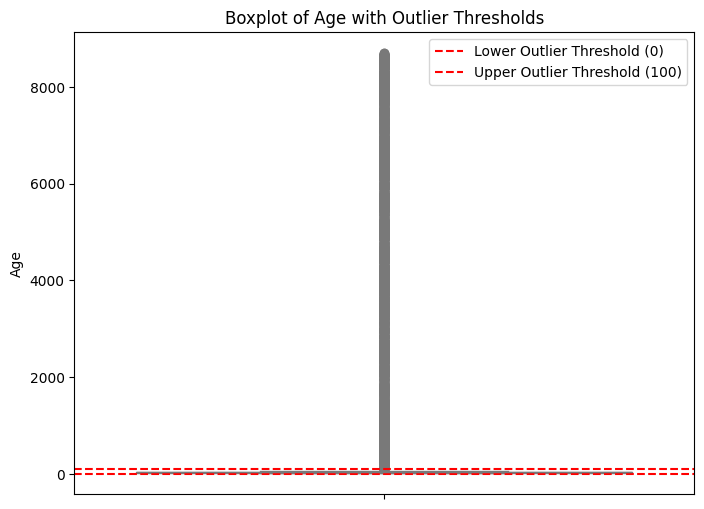

In [15]:
# Tworzenie wykresu boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['Age'], color='lightblue')

# Dodanie czerwonych linii pokazujących granice outlierów
plt.axhline(y=0, color='red', linestyle='--', label='Lower Outlier Threshold (0)')
plt.axhline(y=100, color='red', linestyle='--', label='Upper Outlier Threshold (100)')

plt.ylabel('Age')
plt.title('Boxplot of Age with Outlier Thresholds')
plt.legend()
plt.show()

<ipython-input-20-df10c8416654>:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.97224' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[(df['Age'] < 0) | (df['Age'] > 100), 'Age'] = mean_age


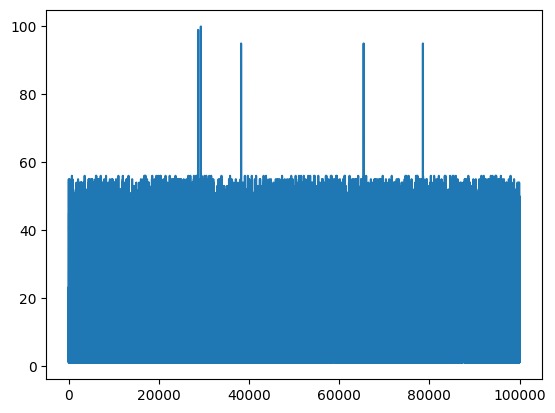

In [20]:
# Replace outliers in 'Age' with the mean
mean_age = df['Age'].between(0, 100).mean() # Calculate the mean age within the valid range
df.loc[(df['Age'] < 0) | (df['Age'] > 100), 'Age'] = mean_age
plt.plot(df['Age'])

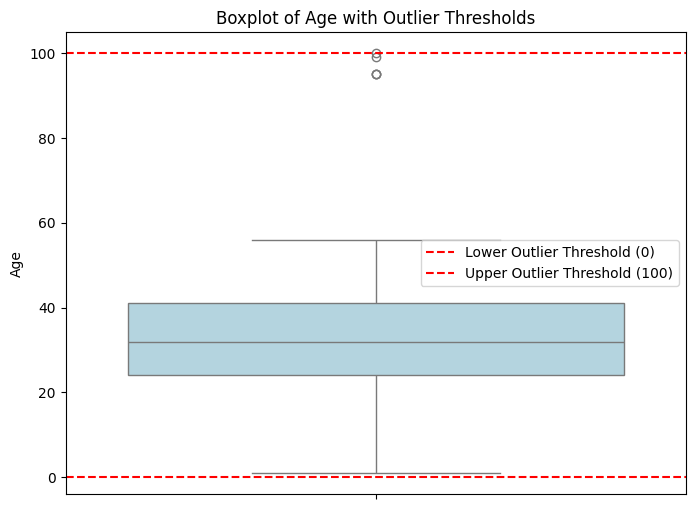

In [21]:
# Tworzenie wykresu boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['Age'], color='lightblue')

# Dodanie czerwonych linii pokazujących granice outlierów
plt.axhline(y=0, color='red', linestyle='--', label='Lower Outlier Threshold (0)')
plt.axhline(y=100, color='red', linestyle='--', label='Upper Outlier Threshold (100)')

plt.ylabel('Age')
plt.title('Boxplot of Age with Outlier Thresholds')
plt.legend()
plt.show()

In [22]:
# Oblicz IQR dla kolumny Monthly_Inhand_Salary
Q1_salary = df['Monthly_Inhand_Salary'].quantile(0.25)
Q3_salary = df['Monthly_Inhand_Salary'].quantile(0.75)
IQR_salary = Q3_salary - Q1_salary

# Określ granice wartości odstających
lower_bound_salary = Q1_salary - 1.5 * IQR_salary
upper_bound_salary = Q3_salary + 1.5 * IQR_salary

# Zastąp wartości odstające medianą
df['Monthly_Inhand_Salary'] = np.where((df['Monthly_Inhand_Salary'] < lower_bound_salary) | (df['Monthly_Inhand_Salary'] > upper_bound_salary),
                                      df['Monthly_Inhand_Salary'].median(), df['Monthly_Inhand_Salary'])


# Oblicz IQR dla kolumny Annual_Income
Q1_income = df['Annual_Income'].quantile(0.25)
Q3_income = df['Annual_Income'].quantile(0.75)
IQR_income = Q3_income - Q1_income

# Określ granice wartości odstających
lower_bound_income = Q1_income - 1.5 * IQR_income
upper_bound_income = Q3_income + 1.5 * IQR_income

# Zastąp wartości odstające medianą
df['Annual_Income'] = np.where((df['Annual_Income'] < lower_bound_income) | (df['Annual_Income'] > upper_bound_income),
                                      df['Annual_Income'].median(), df['Annual_Income'])




```
# Sformatowano jako kod
```

zbadaj korelacje między zmiennymi

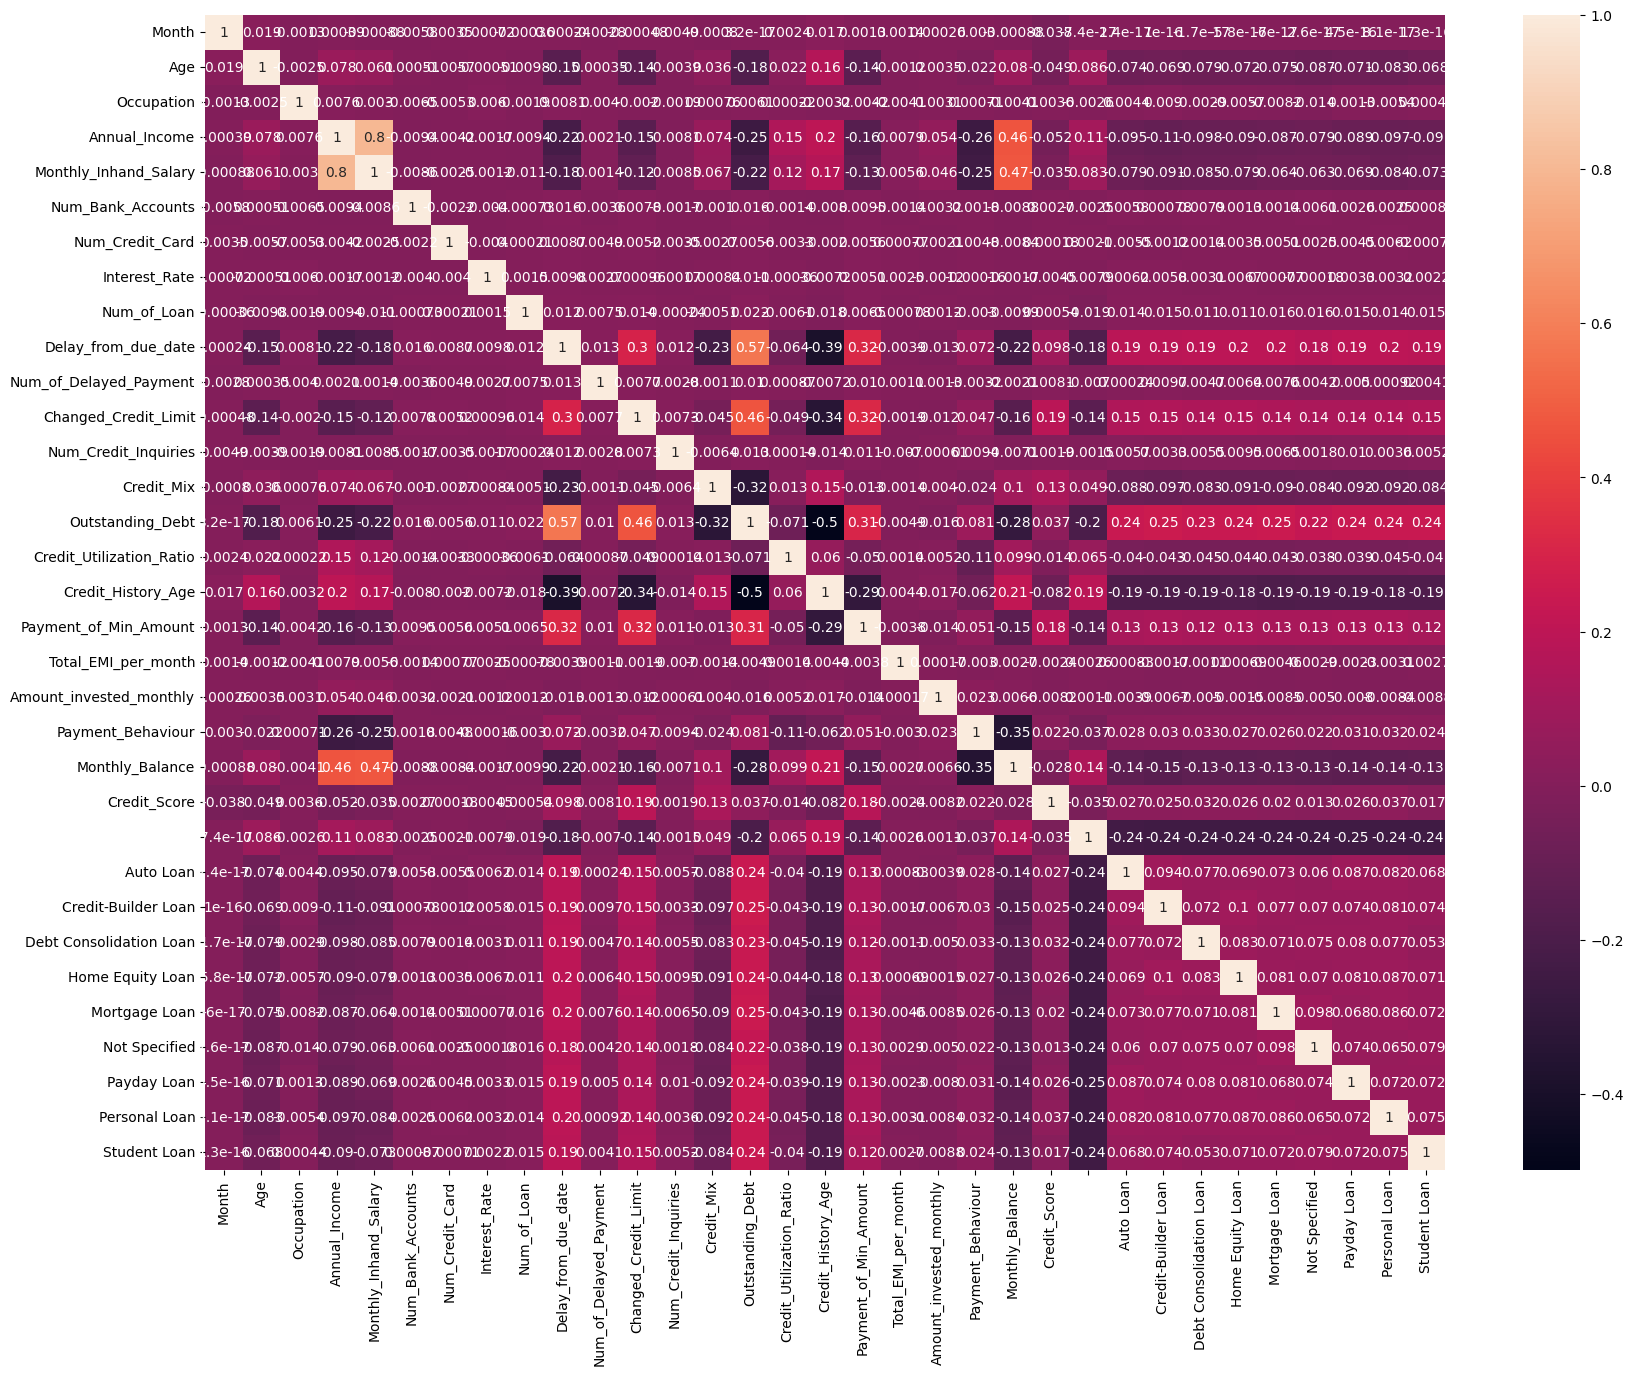

In [23]:
corr_matrix = df.corr()
plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, annot=True)
plt.show()

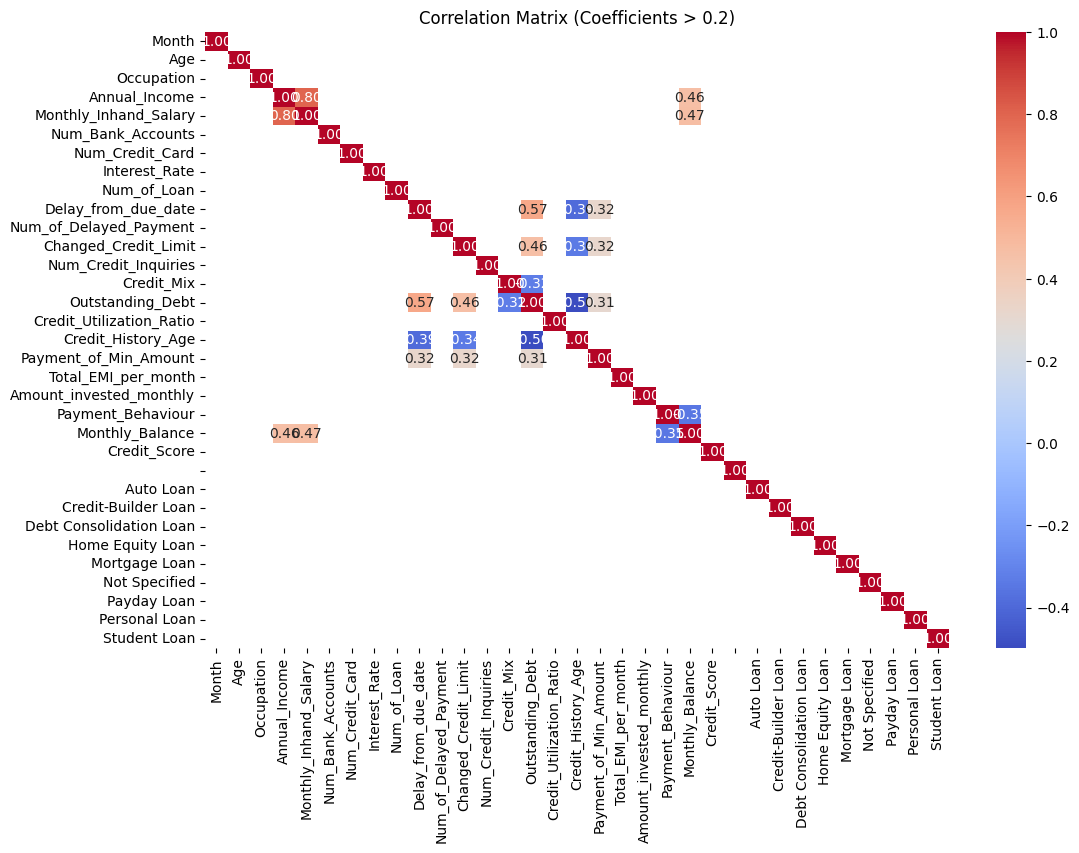

In [24]:
#Pokaz korelacje między zmiennymi tylko jesli są większe od 0.2

# Identify correlations greater than 0.2
corr_matrix = df.corr()
high_corr = corr_matrix[abs(corr_matrix) > 0.3]

# Plotting correlations greater than 0.6
plt.figure(figsize=(12, 8))
sns.heatmap(high_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix (Coefficients > 0.2)')
plt.show()


In [25]:
scaler = MinMaxScaler() # scaler = StandardScaler()
col_float = ['Age', 'Annual_Income','Monthly_Inhand_Salary', 'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Outstanding_Debt', 'Credit_History_Age', 'Total_EMI_per_month', 'Monthly_Balance']

for i in df[col_float]:
  df[i] = scaler.fit_transform(df[[i]])

print(df.head())

   Month      Age  Occupation  Annual_Income  Monthly_Inhand_Salary  \
0      1  0.22244          13       0.083178               0.145768   
1      2  0.22244          13       0.083178               0.372808   
2      3  0.00000          13       0.083178               0.372808   
3      4  0.22244          13       0.083178               0.372808   
4      5  0.22244          13       0.083178               0.145768   

   Num_Bank_Accounts  Num_Credit_Card  Interest_Rate  Num_of_Loan  \
0                  3                4              3            4   
1                  3                4              3            4   
2                  3                4              3            4   
3                  3                4              3            4   
4                  3                4              3            4   

   Delay_from_due_date  ...     Auto Loan  Credit-Builder Loan  \
0             0.111111  ...  0          1                    1   
1             0.055556  ..